In [630]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

In [631]:
ak = pd.read_csv('../datasets/alaska_single_engine_clean.csv')

In [632]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)

In [633]:
ak.head()

,NtsbNo,EventType,Mkey,City,N,HasSafetyRec,ReportType,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Latitude,Longitude,Make,Model,AirCraftCategory,AirportID,AirportName,AmateurBuilt,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,EventYear,EventMonth,EventDay,EventTime,EventSeason
0,ANC23LA086,ACC,193153,Trimble River / Skwentna,N2586R,0,DirectorBrief,None Reported,0,0,0,Unknown,61.775160,-152.15263,CESSNA,182K,AIR,Unknown,Trimble River,0,Unknown,PERS,091,Substantial,Unknown,Unknown,2023,9,24,08:30:00,Fall
1,ANC23LA084,ACC,193128,Bethel,N8192D,0,DirectorBrief,None Reported,0,0,0,Unknown,60.805019,-161.78648,PIPER,PA-18-150,AIR,Unknown,Unknown,0,Unknown,PERS,091,Substantial,Unknown,Unknown,2023,9,20,12:00:00,Fall
2,ANC23LA080,ACC,193097,Homer,N7558H,0,DirectorBrief,None Reported,0,0,0,Unknown,59.646929,-151.49323,CESSNA,A185F,AIR,5BL,HOMER-BELUGA LAKE,0,Unknown,BUS,091,Substantial,VMC,Adventure Airways,2023,9,18,13:00:00,Fall
3,ANC23LA082,ACC,193105,Beaver Creek,N713C,0,DirectorBrief,None Reported,0,0,0,Unknown,64.267579,-147.68704,HELIO,H-295,AIR,Unknown,Unknown,0,NSCH,BUS,135,Substantial,Unknown,WRIGHT AIR SERVICE INC,2023,9,16,16:50:00,Fall
4,ANC23LA078,ACC,193088,NENANA,N907W,0,DirectorBrief,None Reported,0,0,0,Unknown,64.650753,-149.83639,RHODES STEVEN D,SR3500,AIR,Unknown,Unknown,1,Unknown,PERS,091,Substantial,VMC,Unknown,2023,9,16,15:00:00,Fall


In [634]:
ak['AirCraftDamage'].value_counts()

Substantial                4916
Destroyed                   503
Minor                       115
None Reported                52
Substantial,Substantial      17
Destroyed,Destroyed          10
Minor,Substantial            10
Substantial,Destroyed         6
None,None                     6
Destroyed,Substantial         5
Substantial,Minor             5
Unknown                       4
Substantial,None              3
Minor,Destroyed               2
None,Substantial              2
Substantial,Unknown           1
Minor,Minor                   1
Destroyed,None                1
Name: AirCraftDamage, dtype: int64

In [635]:
ak[(ak['AirCraftDamage'].str.contains('None Reported')) | (ak['AirCraftDamage'].str.contains('None,None'))].shape

(58, 31)

In [636]:
ak['AirCraftDamage'] = ak['AirCraftDamage'].replace({'None,None' : 'None Reported'})

In [637]:
ak['AirCraftDamageBool'] = ak['AirCraftDamage'].str.contains('None Reported').astype(int)

In [638]:
ak['AirCraftDamageBool'] = 1 - ak['AirCraftDamageBool']

In [639]:
ak['AirCraftDamageBool'].value_counts()

1    5601
0      58
Name: AirCraftDamageBool, dtype: int64

In [640]:
ak['HighestInjuryLevel'].value_counts()

None Reported    4044
Minor             633
Fatal             599
Serious           383
Name: HighestInjuryLevel, dtype: int64

In [641]:
ak['InjuryBool'] = 1 - ak['HighestInjuryLevel'].str.contains('None Reported').astype(int)

In [642]:
ak['InjuryBool'].value_counts()

0    4044
1    1615
Name: InjuryBool, dtype: int64

In [643]:
ak['DamageOrInjury'] = (ak['AirCraftDamageBool'] | ak['InjuryBool']).astype(int)

In [644]:
ak['DamageOrInjury'].value_counts()

1    5625
0      34
Name: DamageOrInjury, dtype: int64

In [645]:
ak['DamageOrInjury'].mean()

0.9939918713553632

In [646]:
1 - ak['InjuryBool'].mean()

0.7146138893797491

In [647]:
ak.drop(['DamageOrInjury'], axis =1, inplace=True)

In [648]:
ak.head()

,NtsbNo,EventType,Mkey,City,N,HasSafetyRec,ReportType,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,Latitude,Longitude,Make,Model,AirCraftCategory,AirportID,AirportName,AmateurBuilt,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,EventYear,EventMonth,EventDay,EventTime,EventSeason,AirCraftDamageBool,InjuryBool
0,ANC23LA086,ACC,193153,Trimble River / Skwentna,N2586R,0,DirectorBrief,None Reported,0,0,0,Unknown,61.775160,-152.15263,CESSNA,182K,AIR,Unknown,Trimble River,0,Unknown,PERS,091,Substantial,Unknown,Unknown,2023,9,24,08:30:00,Fall,1,0
1,ANC23LA084,ACC,193128,Bethel,N8192D,0,DirectorBrief,None Reported,0,0,0,Unknown,60.805019,-161.78648,PIPER,PA-18-150,AIR,Unknown,Unknown,0,Unknown,PERS,091,Substantial,Unknown,Unknown,2023,9,20,12:00:00,Fall,1,0
2,ANC23LA080,ACC,193097,Homer,N7558H,0,DirectorBrief,None Reported,0,0,0,Unknown,59.646929,-151.49323,CESSNA,A185F,AIR,5BL,HOMER-BELUGA LAKE,0,Unknown,BUS,091,Substantial,VMC,Adventure Airways,2023,9,18,13:00:00,Fall,1,0
3,ANC23LA082,ACC,193105,Beaver Creek,N713C,0,DirectorBrief,None Reported,0,0,0,Unknown,64.267579,-147.68704,HELIO,H-295,AIR,Unknown,Unknown,0,NSCH,BUS,135,Substantial,Unknown,WRIGHT AIR SERVICE INC,2023,9,16,16:50:00,Fall,1,0
4,ANC23LA078,ACC,193088,NENANA,N907W,0,DirectorBrief,None Reported,0,0,0,Unknown,64.650753,-149.83639,RHODES STEVEN D,SR3500,AIR,Unknown,Unknown,1,Unknown,PERS,091,Substantial,VMC,Unknown,2023,9,16,15:00:00,Fall,1,0


In [649]:
ak_atb = ak.drop(['NtsbNo', 'EventType', 'Mkey', 'City', 'N', 'HasSafetyRec', 'ReportType', 'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount', 'AirportID', 'FAR', 'AirCraftDamage', 'Operator', 'EventYear', 'EventSeason', 'EventDay', 'AirCraftDamageBool', 'AirCraftCategory', 'Scheduled'], axis=1)

## Make and Model

In [650]:
def comma_killer(entry):
    if ',' in str(entry):
        split_entry = entry.split(',')
        return split_entry[0]
    return entry

# sample use ak_atb['Model'].apply(lambda x: comma_killer(x))

In [651]:
ak_atb['Model'] = ak_atb['Model'].str.upper()

In [652]:
ak_atb['Model'] = ak_atb['Model'].apply(lambda x: comma_killer(x))

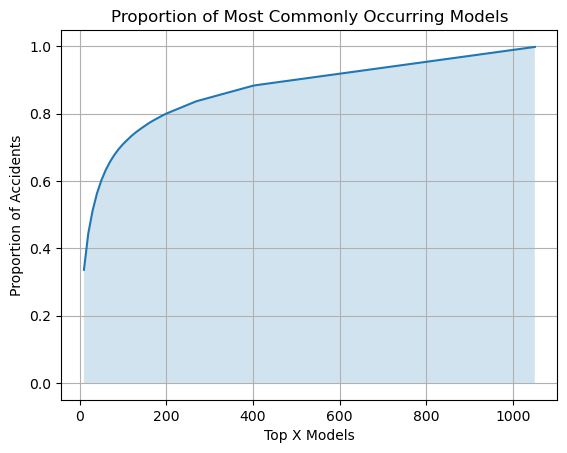

In [653]:
model_counts = np.empty(0, int)
for i in range(10, len(ak_atb['Model'].value_counts()), 10):
    model_counts = np.append(model_counts, ak_atb['Model'].value_counts().head(i).sum())

model_proportion = model_counts / len(ak_atb['Model'])
# ak_atb['Model'].value_counts().head(2).sum()

x = range(10, len(ak_atb['Model'].value_counts()), 10)
y = model_proportion
plt.plot(x, y)
plt.fill_between(x,y, alpha = 0.2)
plt.title('Proportion of Most Commonly Occurring Models')
plt.xlabel('Top X Models')
plt.ylabel('Proportion of Accidents')
plt.grid(True)

In [654]:
ak.EventType.value_counts()

ACC    5523
INC     136
Name: EventType, dtype: int64

In [655]:
ak['AirportID'].value_counts()

Unknown    3510
MRI         134
NONE        113
ANC          64
FAI          53
           ... 
CAL           1
9Z7           1
PAVB          1
A61           1
IAP           1
Name: AirportID, Length: 549, dtype: int64

In [656]:
ak_atb['Model'].value_counts()[150]

5

In [657]:
# list(ak_atb['Model'].value_counts()[:5].index.str.lower())


In [658]:
def is_top_model(model, top_x):
    top_list = list(ak_atb['Model'].value_counts()[:top_x + 1].index.str.upper())
    return True if model.upper() in top_list else False

In [659]:
ak_atb['Model'] = [x.upper() if is_top_model(x,150) else 'OTHER' for x in ak_atb['Model']]


In [660]:
ak_atb['Model'].value_counts()

OTHER        1335
PA-18         441
PA-18-150     248
180           227
185           188
             ... 
G-21A           5
PA-32R          5
180F            5
DC-3C           5
7GC             5
Name: Model, Length: 152, dtype: int64

In [661]:
ak_atb.head()

,ProbableCause,Latitude,Longitude,Make,Model,AirportName,AmateurBuilt,PurposeOfFlight,WeatherCondition,EventMonth,EventTime,InjuryBool
0,Unknown,61.775160,-152.15263,CESSNA,OTHER,Trimble River,0,PERS,Unknown,9,08:30:00,0
1,Unknown,60.805019,-161.78648,PIPER,PA-18-150,Unknown,0,PERS,Unknown,9,12:00:00,0
2,Unknown,59.646929,-151.49323,CESSNA,A185F,HOMER-BELUGA LAKE,0,BUS,VMC,9,13:00:00,0
3,Unknown,64.267579,-147.68704,HELIO,H-295,Unknown,0,BUS,Unknown,9,16:50:00,0
4,Unknown,64.650753,-149.83639,RHODES STEVEN D,OTHER,Unknown,1,PERS,VMC,9,15:00:00,0


In [662]:
ak_atb['OccurredNearAirport'] = 1 - ak_atb['AirportName'].str.contains('Unknown').astype(int)

In [663]:
ak_atb['OccurredNearAirport'].value_counts()

0    3196
1    2463
Name: OccurredNearAirport, dtype: int64

In [664]:
ak_atb.drop('AirportName', axis = 1, inplace = True)

In [665]:
ak_atb['EventTime'] = pd.to_datetime(ak_atb['EventTime'])
ak_atb['EventHour'] = [x.hour for x in ak_atb['EventTime']]

In [666]:
ak_atb.drop('EventTime', axis = 1, inplace = True)

In [667]:
ak_atb.head()

,ProbableCause,Latitude,Longitude,Make,Model,AmateurBuilt,PurposeOfFlight,WeatherCondition,EventMonth,InjuryBool,OccurredNearAirport,EventHour
0,Unknown,61.775160,-152.15263,CESSNA,OTHER,0,PERS,Unknown,9,0,1,8
1,Unknown,60.805019,-161.78648,PIPER,PA-18-150,0,PERS,Unknown,9,0,0,12
2,Unknown,59.646929,-151.49323,CESSNA,A185F,0,BUS,VMC,9,0,1,13
3,Unknown,64.267579,-147.68704,HELIO,H-295,0,BUS,Unknown,9,0,0,16
4,Unknown,64.650753,-149.83639,RHODES STEVEN D,OTHER,1,PERS,VMC,9,0,0,15


In [668]:
ak_atb['Make'] = ak_atb['Make'].str.upper()

In [669]:
ak_atb['Make'] = ak_atb['Make'].apply(lambda x: comma_killer(x))

In [670]:
def is_top_make(make, top_x):
    top_list = list(ak_atb['Make'].value_counts()[:top_x + 1].index.str.upper())
    return True if make.upper() in top_list else False

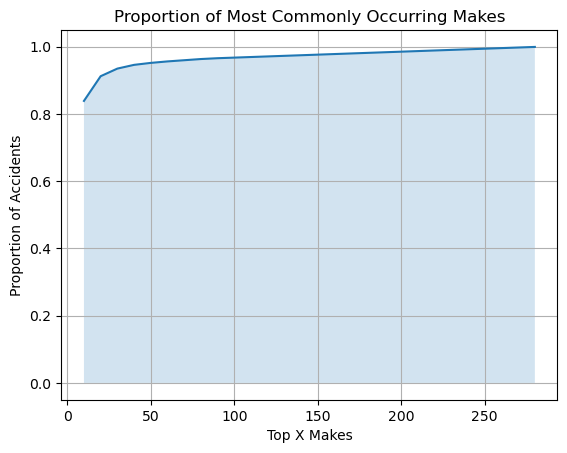

In [671]:
make_counts = np.empty(0, int)
for i in range(10, len(ak_atb['Make'].value_counts()), 10):
    make_counts = np.append(make_counts, ak_atb['Make'].value_counts().head(i).sum())

make_proportion = make_counts / len(ak_atb['Make'])
# ak_atb['Model'].value_counts().head(2).sum()

x = range(10, len(ak_atb['Make'].value_counts()), 10)
y = make_proportion
plt.plot(x, y)
plt.fill_between(x,y, alpha = 0.2)
plt.title('Proportion of Most Commonly Occurring Makes')
plt.xlabel('Top X Makes')
plt.ylabel('Proportion of Accidents')
plt.grid(True)

In [672]:
ak_atb['Make'].value_counts()[40]

4

In [673]:
ak_atb['Make'] = [x.upper() if is_top_make(x,40) else 'OTHER' for x in ak_atb['Make']]


In [674]:

ak_atb.head()

,ProbableCause,Latitude,Longitude,Make,Model,AmateurBuilt,PurposeOfFlight,WeatherCondition,EventMonth,InjuryBool,OccurredNearAirport,EventHour
0,Unknown,61.775160,-152.15263,CESSNA,OTHER,0,PERS,Unknown,9,0,1,8
1,Unknown,60.805019,-161.78648,PIPER,PA-18-150,0,PERS,Unknown,9,0,0,12
2,Unknown,59.646929,-151.49323,CESSNA,A185F,0,BUS,VMC,9,0,1,13
3,Unknown,64.267579,-147.68704,HELIO,H-295,0,BUS,Unknown,9,0,0,16
4,Unknown,64.650753,-149.83639,OTHER,OTHER,1,PERS,VMC,9,0,0,15


In [675]:
ak_atb.drop('ProbableCause', axis = 1, inplace = True)

In [676]:
ak_atb['PurposeOfFlight'] = ak_atb['PurposeOfFlight'].apply(lambda x: comma_killer(x))

In [677]:
ak_atb.to_csv('../datasets/mike_atb.csv', index = False)